### Markowitz Efficient Frontier

Begin by extracting data for PG and MSFTfrom the 1st of January 2018 until 24th March 2023.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

from iexfinance.stocks import Stock, get_historical_data

api_key = 'API_KEY'

In [2]:
start = datetime(2018, 1, 1)
end = datetime(2023, 3, 24)

In [3]:
assets = ['PG', 'MSFT']
pf_data = pd.DataFrame()
for t in assets:
    pf_data[t] = get_historical_data(t, start, end, output_format = 'pandas', token=api_key)['close']

In [4]:
pf_data = pf_data.astype('float64')

Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe. 

In [5]:
pf_data.tail()

,PG,MSFT
2023-03-20,145.13,272.23
2023-03-21,144.08,273.78
2023-03-22,143.99,272.29
2023-03-23,143.79,277.66
2023-03-24,146.72,280.57


<AxesSubplot:>

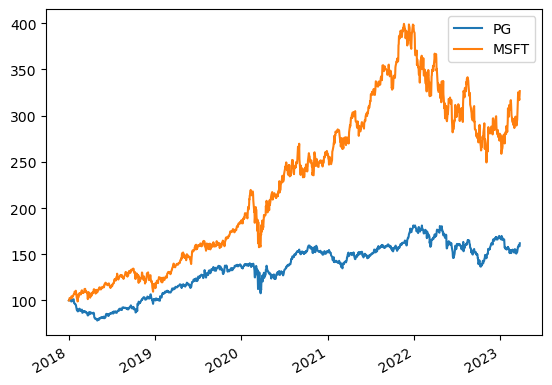

In [6]:
(pf_data/pf_data.iloc[0]*100).plot()

Calculate their logarithmic returns.

In [21]:
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns

,PG,MSFT
2018-01-02,NaN,NaN
2018-01-03,-0.001214,0.004643
2018-01-04,0.007044,0.008763
2018-01-05,0.000658,0.012322
2018-01-08,0.005247,0.001020
...,...,...
2023-03-20,0.015275,-0.026105
2023-03-21,-0.007261,0.005678
2023-03-22,-0.000625,-0.005457
2023-03-23,-0.001390,0.019530


In [8]:
log_returns.mean()*250

PG      0.091544
MSFT    0.224916
dtype: float64

In [9]:
log_returns.cov()*250

,PG,MSFT
PG,0.046904,0.031445
MSFT,0.031445,0.095800


In [10]:
log_returns.corr()

,PG,MSFT
PG,1.000000,0.469105
MSFT,0.469105,1.000000


Create a variable that carries the number of assets in your portfolio.

In [11]:
num_assets = len(assets)
num_assets

2

In [12]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)

weights

array([0.21108985, 0.78891015])

In [13]:
weights[0]+weights[1]

1.0

Now, estimate the expected Portfolio Return, Variance, and Volatility.

### Expected Portfolio Returns

In [14]:
np.sum(weights*log_returns.mean())*250

0.1967623730893226

### Expected Portfolio Variance

In [15]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.07218710149822438

Expected Portfolio Variance

In [16]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.26867657415231494

____________________________________________________________________________

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [17]:
portfolio_returns = []
portfolo_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolo_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

portfolio_returns, portfolo_volatilities

([0.14458509217864027,
  0.15854428935342788,
  0.2146896985416618,
  0.21614874769017745,
  0.16474809796497253,
  0.15869934451326936,
  0.21068830291279142,
  0.15839070615905912,
  0.1640640845084428,
  0.14216656134069247,
  0.18314558476293563,
  0.14408959657648857,
  0.14950261068525225,
  0.0951298288535786,
  0.09418290772946906,
  0.10931653614587872,
  0.17245462926789956,
  0.22074193865746994,
  0.10296576285253453,
  0.09680893110464701,
  0.16243616142680412,
  0.22166695494730557,
  0.1449415446379484,
  0.11934067799096136,
  0.14123090648526906,
  0.15813544559705078,
  0.11930555475470254,
  0.14119629590111266,
  0.1308170210364506,
  0.1337873481565925,
  0.12819925957413542,
  0.130106856677412,
  0.15121793532925704,
  0.14967478129985207,
  0.13289142070675464,
  0.18081690180278154,
  0.14728393420443128,
  0.19415806602563473,
  0.12270491224317132,
  0.20580919495703331,
  0.1431735894415955,
  0.15012556822980547,
  0.16022770497337946,
  0.1089455202447375

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [18]:
portfolio_returns = np.array(portfolio_returns)
portfolo_volatilities = np.array(portfolo_volatilities)

portfolio_returns, portfolo_volatilities

(array([0.14458509, 0.15854429, 0.2146897 , 0.21614875, 0.1647481 ,
        0.15869934, 0.2106883 , 0.15839071, 0.16406408, 0.14216656,
        0.18314558, 0.1440896 , 0.14950261, 0.09512983, 0.09418291,
        0.10931654, 0.17245463, 0.22074194, 0.10296576, 0.09680893,
        0.16243616, 0.22166695, 0.14494154, 0.11934068, 0.14123091,
        0.15813545, 0.11930555, 0.1411963 , 0.13081702, 0.13378735,
        0.12819926, 0.13010686, 0.15121794, 0.14967478, 0.13289142,
        0.1808169 , 0.14728393, 0.19415807, 0.12270491, 0.20580919,
        0.14317359, 0.15012557, 0.1602277 , 0.10894552, 0.19001803,
        0.15890476, 0.18482043, 0.17518055, 0.12323822, 0.10540447,
        0.13137129, 0.18491609, 0.15629758, 0.20635879, 0.12106437,
        0.12198235, 0.18316079, 0.17855477, 0.18145882, 0.15711733,
        0.17860202, 0.14802191, 0.15363345, 0.12490254, 0.11209582,
        0.1988634 , 0.17172282, 0.09615203, 0.19847336, 0.15460915,
        0.13460993, 0.15629055, 0.13162093, 0.16

4) Create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [19]:
portfolio = pd.DataFrame({'Return':portfolio_returns, 'Volitality':portfolo_volatilities})
portfolio

,Return,Volitality
0,0.144585,0.217329
1,0.158544,0.226968
2,0.214690,0.293939
3,0.216149,0.296115
4,0.164748,0.232334
...,...,...
995,0.164027,0.231678
996,0.215145,0.294617
997,0.109916,0.210142
998,0.200064,0.273109


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

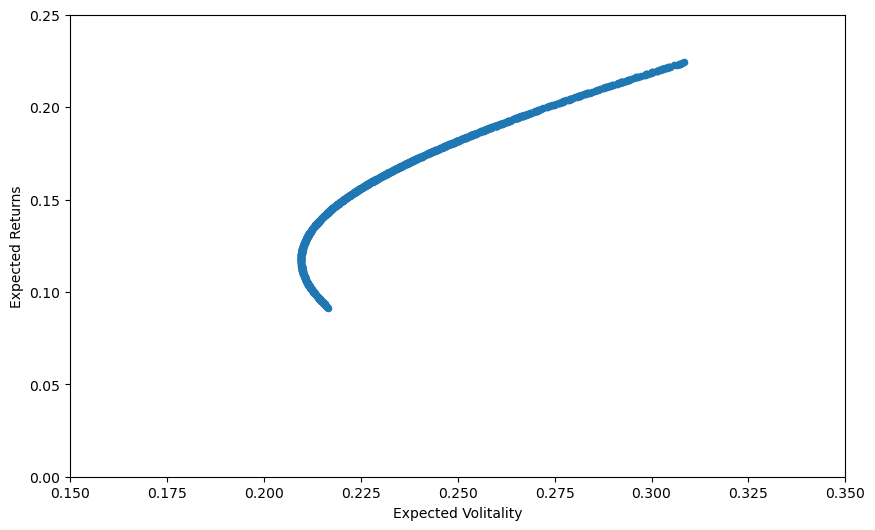

In [20]:
portfolio.plot(x='Volitality', y='Return', kind='scatter', figsize=(10,6))
plt.axis([0.15, 0.35, 0, 0.25])
plt.xlabel('Expected Volitality')
plt.ylabel('Expected Returns')
plt.show()

---